### Importing important Libraries and Pakages

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tqdm

In [23]:
#for regular exressions
import re
#natural language toolkit --> used for text analysis
import nltk
import string
#nlp_utils will help us working with natural language processing
import nlp_utils
#to convert contracted word like i'll to i will
import contractions
#To remove stopwords(Those words that does not add more meaning like the , is)
from nltk.corpus import stopwords



#Stemming is the process of reducing a word to its base or root form, often by removing suffixes or prefixes. 
#Stemming can help reduce the number of words that need to be processed in natural language text analysis, 
#which can improve performance and accuracy of machine learning models.
#stemming will convert the word: "Changing","change","changes" into "chang"



#The WordNetLemmatizer uses WordNet, a lexical database for the English language,
# to look up the base form of a word. It applies morphological analysis to words to remove inflectional endings, 
#such as -s, -ed, and -ing, and returns the base form of the word, known as the lemma. For example, 
#the WordNetLemmatizer would transform the word "running" into "run" and the word "cats" into "cat".

#Lemmatization is often used in natural language processing tasks such as text classification, information retrieval, 
#and sentiment analysis, where it can help to reduce the number of distinct words that need to be considered while 
#preserving the meaning of the text.
#Lemmatization will convert the word changing, changes, changed into change.
from nltk.stem import WordNetLemmatizer


#For processin we have to convert strings to tokens
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

#PorterStemmer is a stemming algorithm. It is widely used in natural language processing (NLP) to extract the base or 
#root form of a word by removing common suffixes.


#SnowballStemmer is more aggressive than PorterStemmer, meaning it can remove more suffixes from a word, 
#which can sometimes result in more accurate stem extraction. Additionally, SnowballStemmer provides stemmers for multiple languages,
# including English, German, French, Spanish, and others.


#LancasterStemmer removes suffixes by following a set of rules that are based on word length, 
#which makes it less predictable than PorterStemmer or SnowballStemmer.


### Importing Dataset

In [24]:
df = pd.read_csv('data/train.csv')

In [25]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Data Analysis

In [26]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

### About Dataset
#### id --> 

#### comment_text --> It is actual text data / comment

#### toxic --> If toxic = 1 means comment is toxic if = 0 means not toxic

#### severe_toxic --> same goes for it too

#### obscene --> If it is vulgar, offensive, indecent, or vulgar, especially in a sexual or explicit way then it will be 1 otherwise 0

#### Threat --> Same for it 0/1

#### Insult --> Same for it 0/1

#### Identity hate --> Same for it


In [27]:
df.shape

(159571, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [29]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#to check if we have null values
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

### Let's Check Each Column values one by one

In [31]:
#toxic
toxic_count = df['toxic'].value_counts()
toxic_count

0    144277
1     15294
Name: toxic, dtype: int64

In [32]:
#severe toxic
s_toxic_count = df['severe_toxic'].value_counts()
s_toxic_count

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [33]:
df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [34]:
df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [35]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [36]:
df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

### Data Visualization

In [37]:
#as we can not plot object type column values like Id and Comment_text
#so firstly we will filter out int64 type columns
#as ID and Comment_text are first two columns so we can use iloc to get columns after these two

#it will give all rows but it will ignore 0th and 1 column
#.sum() will basically sum all the rows that has value = 1
df_act = df.iloc[:,2:].sum()

In [38]:
df_act

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

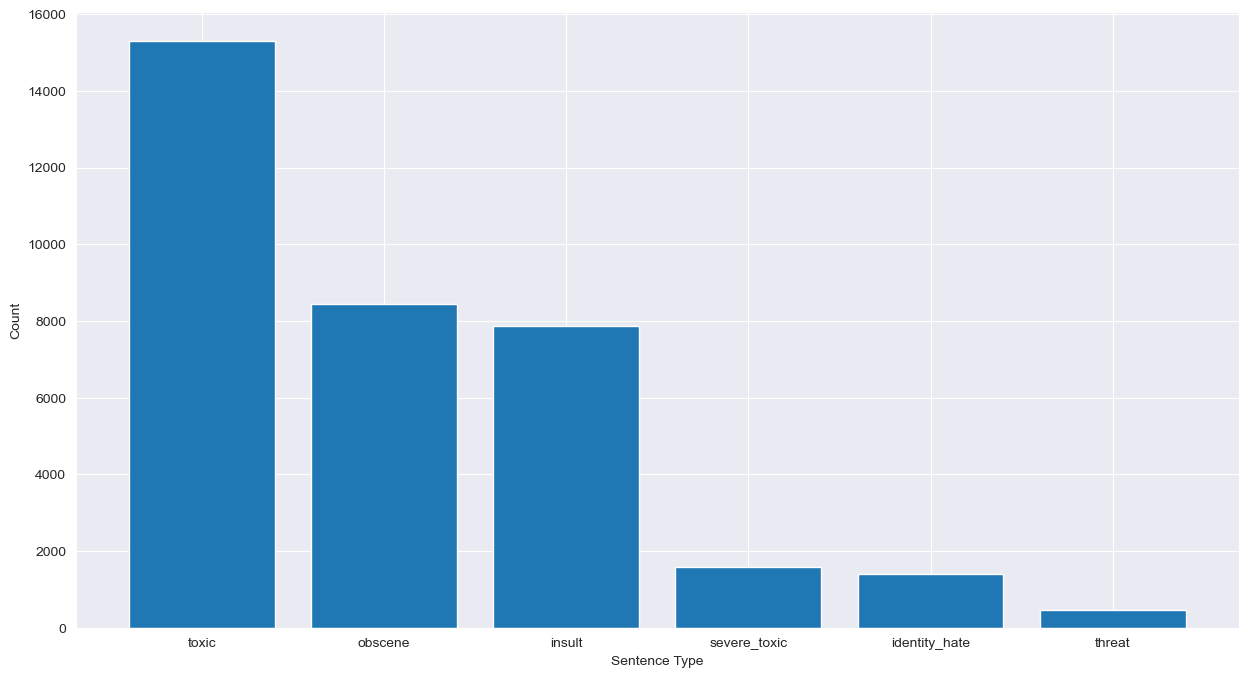

In [39]:
sns.set_style('darkgrid')
#Sorting all the values for good visualization
                #descending order
sorted_cols = df_act.sort_values(ascending=False)
plt.figure(figsize=(15,8))
#so we will plot the values x names of columns
plt.bar(sorted_cols.index, sorted_cols.values);
plt.xlabel('Sentence Type');
plt.ylabel('Count');

### Text Preprocessing

So basically we will do processing on Comments column to make it clean so that we can get good results

In [49]:
#lets check any row of comment
df['comment_text'].head(10)

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
5    "\n\nCongratulations from me as well, use the ...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

# Data Cleaning

In [45]:
def decontracted(phrase):
    """
    We first define a function to expand the contracted phrase into normal words
    """
    # specific
    phrase = re.sub(r"wont", "will not", phrase)
    phrase = re.sub(r"wouldnt", "would not", phrase)
    phrase = re.sub(r"shouldnt", "should not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"cudnt", "could not", phrase)
    phrase = re.sub(r"cant", "can not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)

    # general
    phrase = re.sub(r"n\ t", " not", phrase)
    #phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ s ", " is ", phrase) # prime 
    phrase = re.sub(r"\ d ", " would ", phrase)
    phrase = re.sub(r"\ ll ", " will ", phrase)
    phrase = re.sub(r"\dunno", "do not ", phrase)
    phrase = re.sub(r"ive ", "i have ", phrase) 
    phrase = re.sub(r"im ", "i am ", phrase)
    phrase = re.sub(r"i m ", "i am ", phrase)
    phrase = re.sub(r" w ", " with ", phrase)
    
    return phrase

In [51]:
exp_review = []
for text in df['comment_text']:
  #expanding 
  expanded = decontracted(text)
  exp_review.append(expanded)

  

In [52]:
df[1] = exp_review

In [57]:
cleaned_review = []
for expanded_text in df[1]:
        
        #remove non-alphabetic characters
        expanded_text = re.sub("[^a-zA-Z]"," ", expanded_text)


        #remove url 
        expanded_text = re.sub(r'https?://\S+|www\.\S+', '', expanded_text)
        
        #Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
        expanded_text = expanded_text.translate(str.maketrans('', '', string.punctuation))
        # ''.join([char for char in movie_text_data if char not in string.punctuation])
        
        # remove emails
        expanded_text = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', expanded_text)
    
        cleaned_review.append(expanded_text)       

In [58]:
df[1] = cleaned_review
df[1].head(10)

0    Explanation Why the edits made under my userna...
1    D aww  He matches this background colour I m s...
2    Hey man  I m really not trying to edit war  It...
3      More I can t make any real suggestions on im...
4    You  sir  are my hero  Any chance you remember...
5       Congratulations from me as well  use the to...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word  nonsense  was offensi have ...
9    alignment o nothis subject and which are contr...
Name: 1, dtype: object

## Creating Subsets from Dataframe

Now we will create subsets of the dataframe where we will have seprate dataframe for Insult (with ID and Comment column)

Similarly we will have Toxic Dataframe (with ID and Comment Column)

Similarly we will have Obscene Dataframe (with ID and Comment Column)

Similarly we will have Severe Toxic Dataframe (with ID and Comment Column)

Similarly we will have Threat Dataframe (with ID and Comment Column)

Similarly we will have Identity Hate Dataframe (with ID and Comment Column)

#### Toxic Comments Dataframe

In [62]:
df.columns

Index([           'id',  'comment_text',         'toxic',  'severe_toxic',
             'obscene',        'threat',        'insult', 'identity_hate',
                     1],
      dtype='object')

In [63]:
#so we will use loc this time where we can mention names of column that we want
            # give all rows of 'id','comment_text', 'toxic'
Toxic_comments_df = df.loc[:,['id','comment_text', 'toxic']]

#### Insulting Comments Dataframe

In [64]:
Insulting_comments_df = df.loc[:,['id','comment_text', 'insult']]

#### Severe Toxic Comments Dataframe

In [65]:
Severe_Toxic_comments_df = df.loc[:,['id','comment_text', 'severe_toxic']]

#### Identity hate Comments Dataframe

In [66]:
Identity_hate_comments_df = df.loc[:,['id','comment_text', 'identity_hate']]

#### Threatning Comments Dataframe

In [67]:
threatning_comments_df = df.loc[:,['id','comment_text', 'threat']]

#### Obscene Comments Dataframe

In [68]:
obscene_comments_df = df.loc[:,['id','comment_text', 'obscene']]

# Word Cloud

In [75]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [76]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# Visualising the subset datasets using wordcloud    

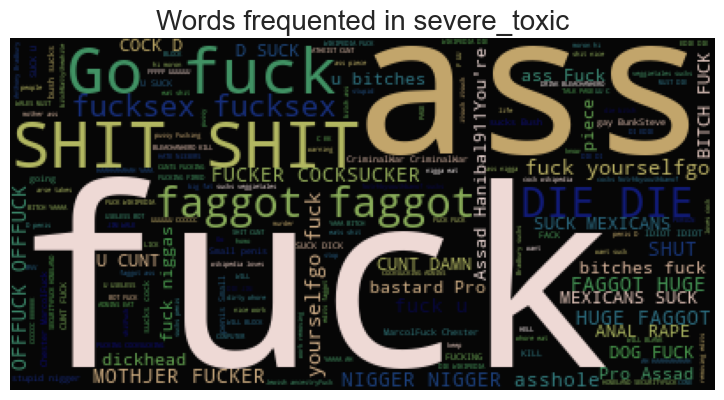

In [77]:
wordcloud(Severe_Toxic_comments_df,'severe_toxic')

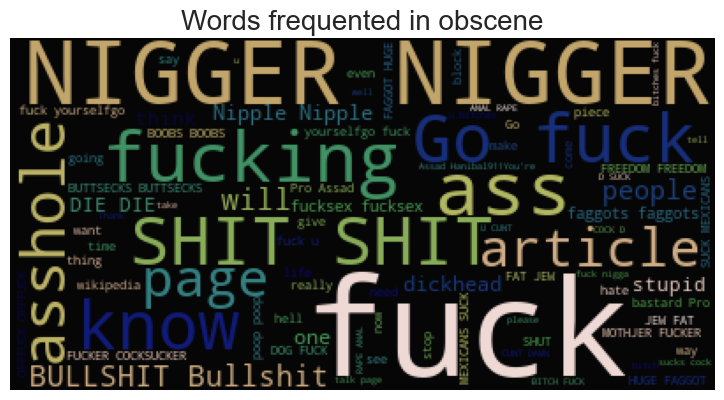

In [79]:
wordcloud(obscene_comments_df,'obscene')

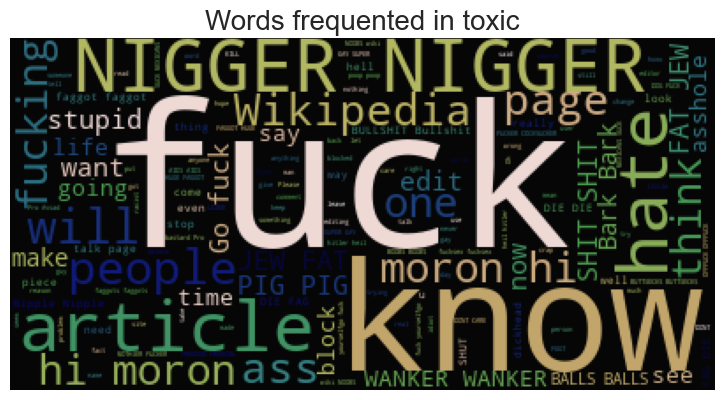

In [80]:
wordcloud(Toxic_comments_df,'toxic')

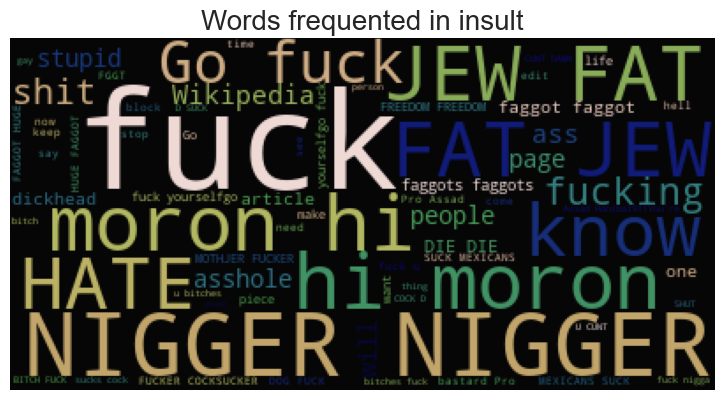

In [81]:
wordcloud(Insulting_comments_df,'insult')

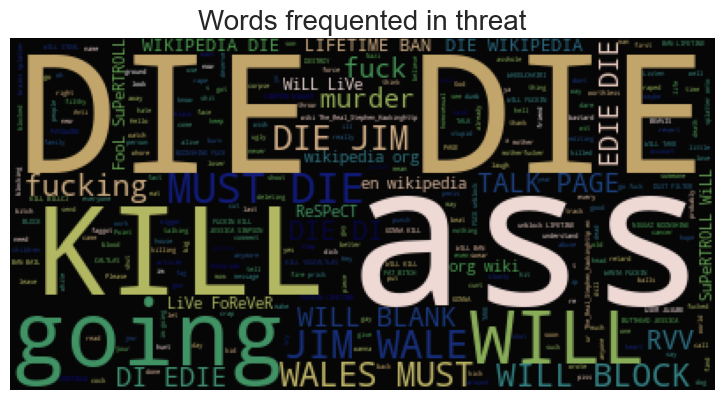

In [82]:
wordcloud(threatning_comments_df,'threat')

## Balancing the Columns

As we know that our dataset was unbalance in the way that number of 0s were high and number 1s were low so we have to balance the dataset first

So what we will do is we will make two dataframes from sub dataframe that we have made, One dataframe will be where every value will be 1 and in other one every value will be zero.
And we will have 5000 enteries in both dataframe to balance the things out, Then we will merge both of them.

In [83]:
Toxic_comments_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [84]:
#so we will get rows where toxic == 1
#and we will get first 5000 rows
Toxic_balances_1 = Toxic_comments_df[Toxic_comments_df['toxic'] == 1].iloc[:5000,:]

In [85]:
#similarly for 0
Toxic_balances_0 = Toxic_comments_df[Toxic_comments_df['toxic'] == 0].iloc[:5000,:]

In [86]:
Toxic_balances_0.shape

(5000, 3)

In [87]:
Toxic_balances_1.shape

(5000, 3)

##### Now Concatenating both of them

In [88]:
toxic_balance = pd.concat([Toxic_balances_1,Toxic_balances_0])

In [89]:
toxic_balance['toxic'].value_counts()

1    5000
0    5000
Name: toxic, dtype: int64

### Doing same thing for other columns

#### Doing it for Severe Toxic Comments df

In [90]:
Severe_Toxic_comments_df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [91]:
severe_Toxic_balances_1 = Severe_Toxic_comments_df[Severe_Toxic_comments_df['severe_toxic'] == 1].iloc[:1595,:]

In [92]:
severe_Toxic_balances_0 = Severe_Toxic_comments_df[Severe_Toxic_comments_df['severe_toxic'] == 0].iloc[:1595,:]

In [93]:
severe_toxic_balance = pd.concat([severe_Toxic_balances_1,severe_Toxic_balances_0])

In [94]:
severe_toxic_balance['severe_toxic'].value_counts()

1    1595
0    1595
Name: severe_toxic, dtype: int64

In [95]:
########################################################################################################

#### Doing for Obscene Comments df

In [96]:
obscene_comments_df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [101]:
#we have select 8449 to balance out the things

In [102]:
obscene_balances_1 = obscene_comments_df[obscene_comments_df['obscene'] == 1].iloc[:5000,:]

In [103]:
obscene_balances_0 = obscene_comments_df[obscene_comments_df['obscene'] == 0].iloc[:5000,:]

In [105]:
obscene_balance = pd.concat([obscene_balances_1,obscene_balances_0])

In [106]:
obscene_balance['obscene'].value_counts()

1    5000
0    5000
Name: obscene, dtype: int64

In [107]:
##########################################################################################################

#### Doing for Threatning Comments df

In [108]:
threatning_comments_df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [109]:
threat_balances_1 = threatning_comments_df[threatning_comments_df['threat'] == 1].iloc[:478,:]

In [110]:
threat_balances_0 = threatning_comments_df[threatning_comments_df['threat'] == 0].iloc[:478,:]

In [111]:
threat_balance = pd.concat([threat_balances_1,threat_balances_0])

In [112]:
threat_balance['threat'].value_counts()

1    478
0    478
Name: threat, dtype: int64

#### Balancing for Insult comments

In [113]:
Insulting_comments_df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [114]:
Insult_balances_1 = Insulting_comments_df[Insulting_comments_df['insult'] == 1].iloc[:5000,:]

In [115]:
Insult_balances_0 = Insulting_comments_df[Insulting_comments_df['insult'] == 0].iloc[:5000,:]

In [116]:
insult_balance = pd.concat([Insult_balances_1,Insult_balances_0])

In [117]:
insult_balance['insult'].value_counts()

1    5000
0    5000
Name: insult, dtype: int64

#### Balancing for Idetifying hate comments

In [118]:
Identity_hate_comments_df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [119]:
Identify_balances_1 = Identity_hate_comments_df[Identity_hate_comments_df['identity_hate'] == 1].iloc[:1405,:]

In [120]:
Identify_balances_0 = Identity_hate_comments_df[Identity_hate_comments_df['identity_hate'] == 0].iloc[:1405,:]

In [121]:
Indentify_balance = pd.concat([Identify_balances_1,Identify_balances_0])

In [122]:
Indentify_balance['identity_hate'].value_counts()

1    1405
0    1405
Name: identity_hate, dtype: int64

# We will save all the clean and processed dataset as CSV files

In [150]:
toxic_balance.to_csv('Toxic_Data.csv')

In [151]:
severe_toxic_balance.to_csv('Severe_Toxix_Data.csv')

In [152]:
Indentify_balance.to_csv('Indentity_Data.csv')

In [153]:
insult_balance.to_csv('insult_Data.csv')

In [155]:
threat_balance.to_csv('Threat_Data.csv')

In [156]:
obscene_balance.to_csv('obscene_Data.csv')